In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
pd.set_option('display.max_columns', None)

In [33]:
df = pd.read_csv('../gurgaon_data/gurgaon_properties_missing_value_imputation.csv')

In [34]:
df.shape

(3552, 18)

In [35]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3,2,2,2.0,New Property,850.0,0,0,0,0,0,1,8
1,flat,smart world gems,sector 89,0.95,8597.0,2,2,2,4.0,New Property,1226.0,1,1,0,0,0,1,38
2,flat,breez global hill view,sohna road,0.32,5470.0,2,2,1,17.0,New Property,1000.0,0,0,0,0,0,1,49
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3,4,3+,10.0,Relatively New,1615.0,0,1,0,0,1,2,174
4,flat,suncity avenue,sector 102,0.48,9023.0,2,2,1,5.0,Relatively New,582.0,0,0,1,0,0,1,159


In [36]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [37]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 36,0.82,3,2,2,2.0,New Property,850.0,0,0,0,0,0,1,8
1,flat,sector 89,0.95,2,2,2,4.0,New Property,1226.0,1,1,0,0,0,1,38
2,flat,sohna road,0.32,2,2,1,17.0,New Property,1000.0,0,0,0,0,0,1,49
3,flat,sector 92,1.60,3,4,3+,10.0,Relatively New,1615.0,0,1,0,0,1,2,174
4,flat,sector 102,0.48,2,2,1,5.0,Relatively New,582.0,0,0,1,0,0,1,159


### luxury score

<Axes: ylabel='luxury_score'>

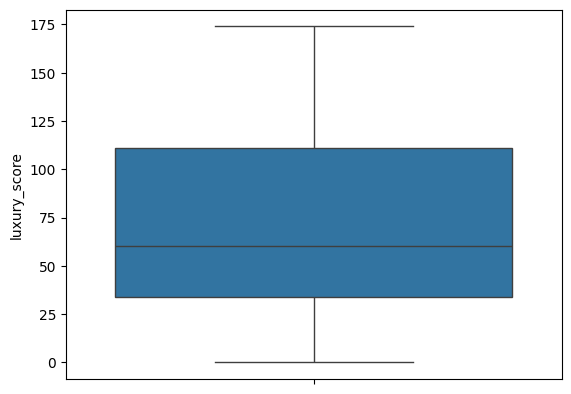

In [38]:
sns.boxplot(df['luxury_score'])

In [9]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [39]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [40]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 36,0.82,3,2,2,2.0,New Property,850.0,0,0,0,0,0,1,8,Low
1,flat,sector 89,0.95,2,2,2,4.0,New Property,1226.0,1,1,0,0,0,1,38,Low
2,flat,sohna road,0.32,2,2,1,17.0,New Property,1000.0,0,0,0,0,0,1,49,Low
3,flat,sector 92,1.60,3,4,3+,10.0,Relatively New,1615.0,0,1,0,0,1,2,174,High
4,flat,sector 102,0.48,2,2,1,5.0,Relatively New,582.0,0,0,1,0,0,1,159,High


### floorNum

<Axes: ylabel='floorNum'>

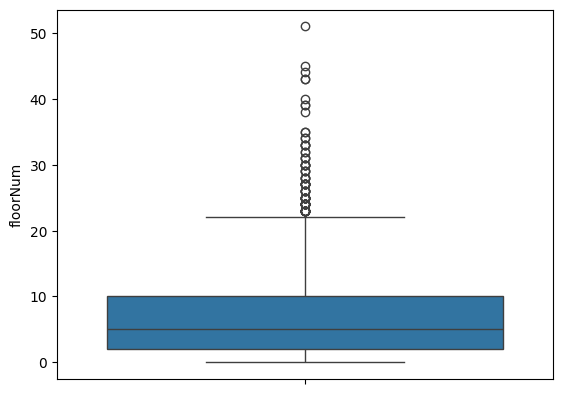

In [41]:
sns.boxplot(df['floorNum'])

In [42]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [43]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [44]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,sector 36,0.82,3,2,2,2.0,New Property,850.0,0,0,0,0,0,1,8,Low,Low Floor
1,flat,sector 89,0.95,2,2,2,4.0,New Property,1226.0,1,1,0,0,0,1,38,Low,Mid Floor
2,flat,sohna road,0.32,2,2,1,17.0,New Property,1000.0,0,0,0,0,0,1,49,Low,High Floor
3,flat,sector 92,1.60,3,4,3+,10.0,Relatively New,1615.0,0,1,0,0,1,2,174,High,Mid Floor
4,flat,sector 102,0.48,2,2,1,5.0,Relatively New,582.0,0,0,1,0,0,1,159,High,Mid Floor


In [45]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [46]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 36,0.82,3,2,2,New Property,850.0,0,0,0,0,0,1,Low,Low Floor
1,flat,sector 89,0.95,2,2,2,New Property,1226.0,1,1,0,0,0,1,Low,Mid Floor
2,flat,sohna road,0.32,2,2,1,New Property,1000.0,0,0,0,0,0,1,Low,High Floor
3,flat,sector 92,1.60,3,4,3+,Relatively New,1615.0,0,1,0,0,1,2,High,Mid Floor
4,flat,sector 102,0.48,2,2,1,Relatively New,582.0,0,0,1,0,0,1,High,Mid Floor


In [47]:
df.shape

(3552, 18)

In [48]:
from sklearn.preprocessing import OrdinalEncoder


# ordinal encoder converts the categorical columns into numbers, as required for running models
# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'sector 1',
       'sector 102', 'sector 103', 'sector 104', 'sector 105',
       'sector 106', 'sector 107', 'sector 108', 'sector 109',
       'sector 10a', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 17a', 'sector 17b', 'sector 2',
       'sector 21', 'sector 22', 'sector 23', 'sector 24', 'sector 25',
       'sector 26', 'sector 27', 'sector 28', 'sector 3',
       'sector 3 phase 2', 'sector 3 phase 3 extension', 'sector 30',
       'sector 31', 'sector 33', 'sector 36', 'sector 36a', 'sector 37',
       'sector 37c', 'sector 37d', 'sector 38', 'sector 39', 'sector 4',
       'sector 40', 'sector 41', 'sector 43', 'sector 45', 'sector 46',
       'sector 47', 'sector 48', 'sector 49', 'sector 5', 'sector 50',
       'sector 51', 'sector 52', 'sector 53', 'sector 54', 'sector 5

In [49]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,40.0,3,2,2.0,1.0,850.00,0,0,0,0,0,1,1.0,1.0
1,0.0,101.0,2,2,2.0,1.0,1226.00,1,1,0,0,0,1,1.0,2.0
2,0.0,111.0,2,2,1.0,1.0,1000.00,0,0,0,0,0,1,1.0,0.0
3,0.0,105.0,3,4,4.0,3.0,1615.00,0,1,0,0,1,2,0.0,2.0
4,0.0,4.0,2,2,1.0,3.0,582.00,0,0,1,0,0,1,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3547,0.0,96.0,2,2,1.0,3.0,532.00,0,0,0,0,0,1,2.0,2.0
3548,1.0,11.0,5,5,4.0,3.0,6225.74,1,1,1,1,0,1,0.0,1.0
3549,0.0,25.0,1,1,1.0,0.0,665.00,0,0,0,0,0,2,2.0,2.0
3550,1.0,50.0,5,6,3.0,0.0,5488.03,1,1,1,1,0,1,2.0,2.0


In [50]:
y_label

0        0.82
1        0.95
2        0.32
3        1.60
4        0.48
        ...  
3547     0.37
3548     6.00
3549     0.60
3550    15.50
3551     1.78
Name: price, Length: 3552, dtype: float64

### Technique 1 - Correlation Analysis

<Axes: >

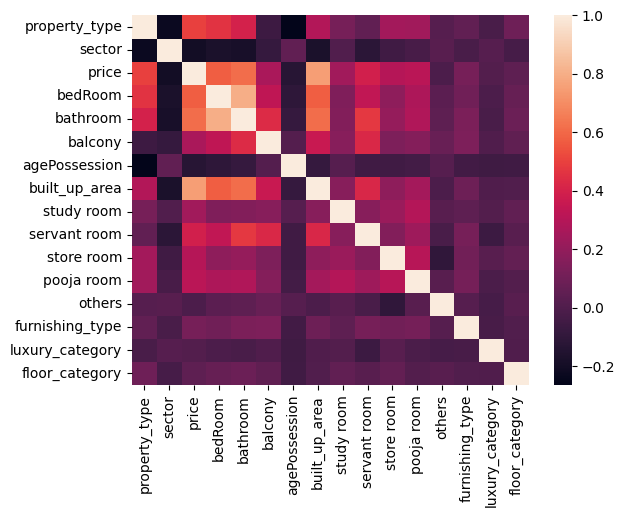

In [51]:
sns.heatmap(data_label_encoded.corr())

In [52]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.202880
1,price,1.000000
2,bedRoom,0.572570
3,bathroom,0.610659
4,balcony,0.268905
5,agePossession,-0.132845
6,built_up_area,0.748745
7,study room,0.241383
8,servant room,0.390463
9,store room,0.300743


### Technique 2 - Random Forest Feature Importance

In [53]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.649207
0,property_type,0.107728
1,sector,0.103358
3,bathroom,0.023134
8,servant room,0.020834
2,bedRoom,0.020737
4,balcony,0.012969
5,agePossession,0.012677
7,study room,0.011212
12,furnishing_type,0.009137


### Technique 3 - Gradient Boosting Feature importances

In [56]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.695318
1,sector,0.097985
0,property_type,0.095759
2,bedRoom,0.035581
3,bathroom,0.030932
8,servant room,0.021595
7,study room,0.010611
9,store room,0.004928
4,balcony,0.002884
12,furnishing_type,0.001882


### Technique 4 - Permutation Importance

In [57]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.799285
0,property_type,0.178680
1,sector,0.142850
2,bedRoom,0.014862
8,servant room,0.014152
3,bathroom,0.012811
5,agePossession,0.006161
7,study room,0.005141
14,floor_category,0.002119
13,luxury_category,0.001834


### Technique 5 - LASSO

In [61]:
# we did ordinal encoding to some columns although there was no order whatsoever
# firstly we are going to apply linear model, they are not so good with ordinal encoding

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5


,feature,lasso_coeff
6,built_up_area,1.509440
0,property_type,0.703122
3,bathroom,0.284135
9,store room,0.209424
8,servant room,0.183850
7,study room,0.175269
10,pooja room,0.081859
13,luxury_category,0.044219
12,furnishing_type,0.041611
2,bedRoom,0.016613


### Technique 6 - RFE

In [62]:
# one of the best selection technique

from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6


,feature,rfe_score
6,built_up_area,0.652083
1,sector,0.104670
0,property_type,0.101481
3,bathroom,0.024502
2,bedRoom,0.024182
8,servant room,0.021103
4,balcony,0.013410
5,agePossession,0.011650
7,study room,0.009264
12,furnishing_type,0.008827


### Technique 7 - Linear Regression Weights

In [63]:
# tree based model more reliable then linear model because we used ordinal encoding
# for linear based model, we should use one-hot encoding technique
# Train a linear regression model on the label-encoded and standardized training data


from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7


,feature,reg_coeffs
6,built_up_area,1.512063
0,property_type,0.701318
3,bathroom,0.290736
9,store room,0.214011
8,servant room,0.193839
7,study room,0.184028
10,pooja room,0.085182
13,luxury_category,0.054902
12,furnishing_type,0.051111
2,bedRoom,0.020348


### Technique 8 - SHAP

In [ ]:
!pip install shap

In [82]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values


ImportError: Numba needs NumPy 2.0 or less. Got NumPy 2.1.

In [ ]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

In [84]:
# final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')

final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').set_index('feature')

In [85]:
final_fi_df


,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs
feature,,,,,,,
sector,-0.202880,0.103358,0.097985,0.142850,-0.047817,0.104670,-0.056452
bedRoom,0.572570,0.020737,0.035581,0.014862,0.016613,0.024182,0.020348
bathroom,0.610659,0.023134,0.030932,0.012811,0.284135,0.024502,0.290736
balcony,0.268905,0.012969,0.002884,0.001247,-0.031114,0.013410,-0.054088
agePossession,-0.132845,0.012677,0.001301,0.006161,-0.000000,0.011650,-0.002616
built_up_area,0.748745,0.649207,0.695318,0.799285,1.509440,0.652083,1.512063
study room,0.241383,0.011212,0.010611,0.005141,0.175269,0.009264,0.184028
servant room,0.390463,0.020834,0.021595,0.014152,0.183850,0.021103,0.193839
store room,0.300743,0.007588,0.004928,-0.003884,0.209424,0.006074,0.214011


In [86]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [88]:
# final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.755805
sector             0.120959
bedRoom            0.026099
bathroom           0.025061
servant room       0.021225
study room         0.009941
agePossession      0.008697
balcony            0.008475
furnishing_type    0.005766
luxury_category    0.004881
store room         0.004205
floor_category     0.004200
pooja room         0.002811
others             0.001876
dtype: float64

In [89]:
# to drop pooja room, study room, others
X_label

# to drop the above mentioned columns, we need to show there is no effect on the paramters even if we remove the above stated columns
# then we could drop off those columns

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,40.0,3,2,2.0,1.0,850.00,0,0,0,0,0,1,1.0,1.0
1,0.0,101.0,2,2,2.0,1.0,1226.00,1,1,0,0,0,1,1.0,2.0
2,0.0,111.0,2,2,1.0,1.0,1000.00,0,0,0,0,0,1,1.0,0.0
3,0.0,105.0,3,4,4.0,3.0,1615.00,0,1,0,0,1,2,0.0,2.0
4,0.0,4.0,2,2,1.0,3.0,582.00,0,0,1,0,0,1,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3547,0.0,96.0,2,2,1.0,3.0,532.00,0,0,0,0,0,1,2.0,2.0
3548,1.0,11.0,5,5,4.0,3.0,6225.74,1,1,1,1,0,1,0.0,1.0
3549,0.0,25.0,1,1,1.0,0.0,665.00,0,0,0,0,0,2,2.0,2.0
3550,1.0,50.0,5,6,3.0,0.0,5488.03,1,1,1,1,0,1,2.0,2.0


In [90]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [91]:
scores.mean()

np.float64(0.8228657069201611)

In [92]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [93]:
scores.mean()

np.float64(0.8167691280817951)

In [94]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [95]:
export_df.to_csv('../gurgaon_data/gurgaon_properties_post_feature_selection.csv', index=False)

In [ ]:
export_df

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,0.0,36.0,3.0,2.0,2.0,1.0,850.0,0.0,0.0,0.0,1.0,1.0,0.82
1,0.0,95.0,2.0,2.0,2.0,1.0,1226.0,1.0,0.0,0.0,1.0,2.0,0.95
2,0.0,103.0,2.0,2.0,1.0,1.0,1000.0,0.0,0.0,0.0,1.0,0.0,0.32
3,0.0,99.0,3.0,4.0,4.0,3.0,1615.0,1.0,0.0,1.0,0.0,2.0,1.60
4,0.0,5.0,2.0,2.0,1.0,3.0,582.0,0.0,1.0,0.0,0.0,2.0,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,90.0,2.0,2.0,1.0,3.0,532.0,0.0,0.0,0.0,2.0,2.0,0.37
3550,1.0,12.0,5.0,5.0,4.0,3.0,6228.0,1.0,1.0,0.0,0.0,1.0,6.00
3551,0.0,23.0,1.0,1.0,1.0,0.0,665.0,0.0,0.0,1.0,2.0,2.0,0.60
3552,1.0,44.0,5.0,6.0,3.0,0.0,5490.0,1.0,1.0,0.0,2.0,2.0,15.50
